# TP TITANIC

## Importation des Bibliothèques

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

## Création des Graphiques Batons en ajoutant des valeurs manquantes dans le fichier csv

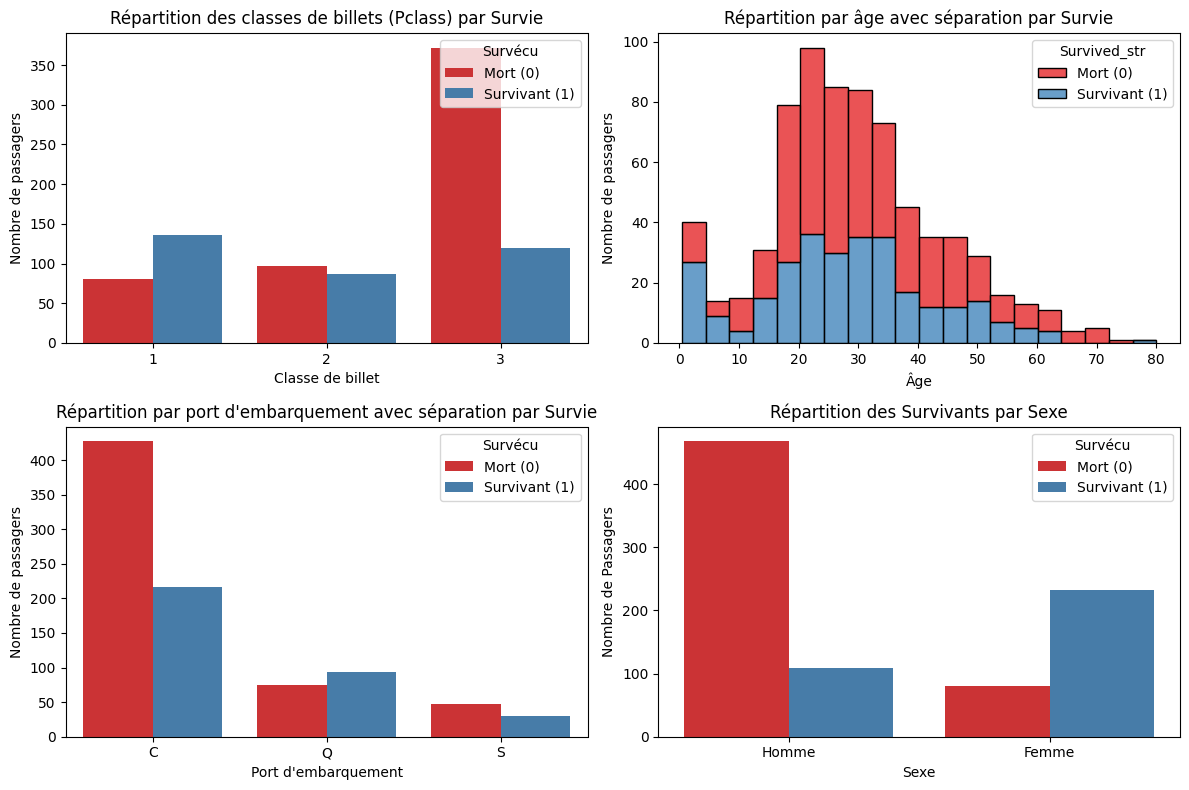

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
train_df = pd.read_csv('train.csv')

# Étape 1 : Visualisation par classe de billet (Pclass) avec séparation par 'Survived'
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set1')
plt.title("Répartition des classes de billets (Pclass) par Survie")
plt.xlabel("Classe de billet")
plt.ylabel("Nombre de passagers")
plt.legend(title='Survécu', loc='upper right', labels=['Mort (0)', 'Survivant (1)'])

# Étape 2 : Visualisation par âge (histogramme) avec séparation par 'Survived'
plt.subplot(2, 2, 2)
train_df['Survived_str'] = train_df['Survived'].map({0: 'Mort (0)', 1: 'Survivant (1)'})
sns.histplot(data=train_df, x='Age', hue='Survived_str', multiple='stack', bins=20, palette='Set1', edgecolor='black')
plt.title("Répartition par âge avec séparation par Survie")
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")

# Étape 3 : Visualisation par port d'embarquement (Embarked) avec séparation par 'Survived'
plt.subplot(2, 2, 3)
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette='Set1')
plt.title("Répartition par port d'embarquement avec séparation par Survie")
plt.xlabel("Port d'embarquement")
plt.ylabel("Nombre de passagers")
plt.xticks(ticks=[0, 1, 2], labels=['C', 'Q', 'S'])
plt.legend(title='Survécu', loc='upper right', labels=['Mort (0)', 'Survivant (1)'])

# Étape 4 : Visualisation par sexe avec séparation par 'Survived'
plt.subplot(2, 2, 4)
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Set1')
plt.title("Répartition des Survivants par Sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de Passagers")
plt.legend(title='Survécu', loc='upper right', labels=['Mort (0)', 'Survivant (1)'])
plt.xticks(ticks=[0, 1], labels=['Homme', 'Femme'])

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


# Création de la matrice de confusion en remplacant les valeurs manquantes dans le tableau

Valeurs manquantes dans le DataFrame :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Valeurs manquantes après le traitement :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Types de données dans le DataFrame :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_Q        bool
Embarked_S        bool
dtype: object
Valeurs manquantes dans X :
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare

<Figure size 800x600 with 0 Axes>

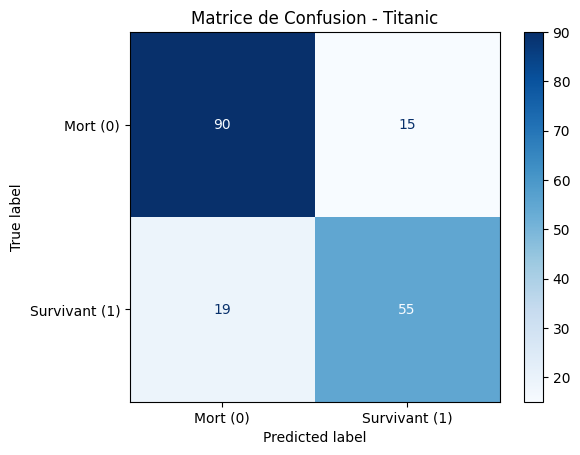

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Charger les fichiers CSV
train_df = pd.read_csv('train.csv')

# Vérifier les valeurs manquantes
print("Valeurs manquantes dans le DataFrame :")
print(train_df.isnull().sum())

# Remplir les valeurs manquantes
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())  # Remplacer les NaN dans 'Age' par la moyenne
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].mean())  # Remplacer les NaN dans 'Fare' par la moyenne
train_df['Cabin'] = train_df['Cabin'].fillna('unknown')  # Remplacer les NaN dans 'Cabin' par 'unknown'
train_df['Embarked'] = train_df['Embarked'].fillna('S')  # Remplacer les NaN dans 'Embarked' par 'S' (ou une autre valeur par défaut)

# Vérification des valeurs manquantes après le traitement
print("Valeurs manquantes après le traitement :")
print(train_df.isnull().sum())

# Remplacer les valeurs catégoriques par des numériques
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Convertir la colonne 'Embarked' en variables indicatrices
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Vérification des types de données
print("Types de données dans le DataFrame :")
print(train_df.dtypes)

# Sélection des caractéristiques
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = train_df[features]
y = train_df['Survived']

# Vérifier la présence de NaN dans X
print("Valeurs manquantes dans X :")
print(X.isnull().sum())

# S'assurer que X ne contient pas de NaN
if X.isnull().sum().sum() > 0:
    raise ValueError("X contient encore des valeurs NaN.")

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner un modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mort (0)', 'Survivant (1)'])
disp.plot(cmap='Blues')
plt.title('Matrice de Confusion - Titanic')
plt.show()


### A partir de l'entrainement, réalisation de la prédiction du fichier test

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger le fichier test
test_df = pd.read_csv('test.csv')

# Afficher les premières lignes du DataFrame de test
print(test_df.head())

# Remplir les valeurs manquantes dans le DataFrame de test
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())  # Remplacer les NaN dans 'Age' par la moyenne
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())  # Remplacer les NaN dans 'Fare' par la moyenne
test_df['Cabin'] = test_df['Cabin'].fillna('unknown')  # Remplacer les NaN dans 'Cabin' par 'unknown'
test_df['Embarked'] = test_df['Embarked'].fillna('S')  # Remplacer les NaN dans 'Embarked' par 'S' (ou une autre valeur par défaut)

# Remplacer les valeurs catégoriques par des numériques
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Convertir la colonne 'Embarked' en variables indicatrices
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

# Sélectionner les mêmes caractéristiques que dans l'ensemble d'entraînement
features_test = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X_test_final = test_df[features_test]

# Normaliser les données
scaler = StandardScaler()
X_test_final = scaler.fit_transform(X_test_final)

# Prédire les classes sur l'ensemble de test
test_predictions = model.predict(X_test_final)

# Ajouter les prédictions au DataFrame test
test_df['Survived'] = test_predictions

# Sauvegarder les résultats dans un nouveau fichier CSV
test_df[['PassengerId', 'Survived']].to_csv('test_predictions.csv', index=False)

print("Les résultats des prédictions ont été enregistrés dans 'test_predictions.csv'.")


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Les résultats des prédictions ont été enregistrés dans 'test_predictions.csv'.


## Le score obtenu après la soumission du fichier 'test_predictions.csv' dans Kaggle est de 0.77751